(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: ylabel='Number of airline passengers'>)

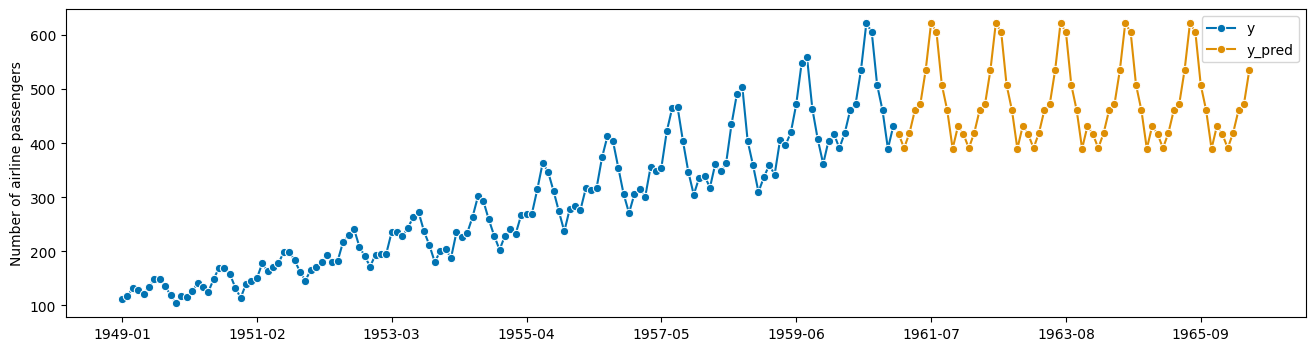

In [100]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series

import numpy as np
# step 1: data specification
y = load_airline()

# step 2: specifying forecasting horizon
fh = np.arange(1, 67)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)

plot_series(y, y_pred, labels=["y", "y_pred"])




In [108]:
from file import readFile
import pandas as pd

dailyData = readFile('dailies')
dataset = pd.json_normalize(dailyData)
dataset = pd.json_normalize(dailyData)
# dataset.head()
dataset['dateIndex'] = pd.to_datetime(dataset['date'])
dataset = dataset.set_index('dateIndex', drop=True)
dataset.index.name = None

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='max'>)

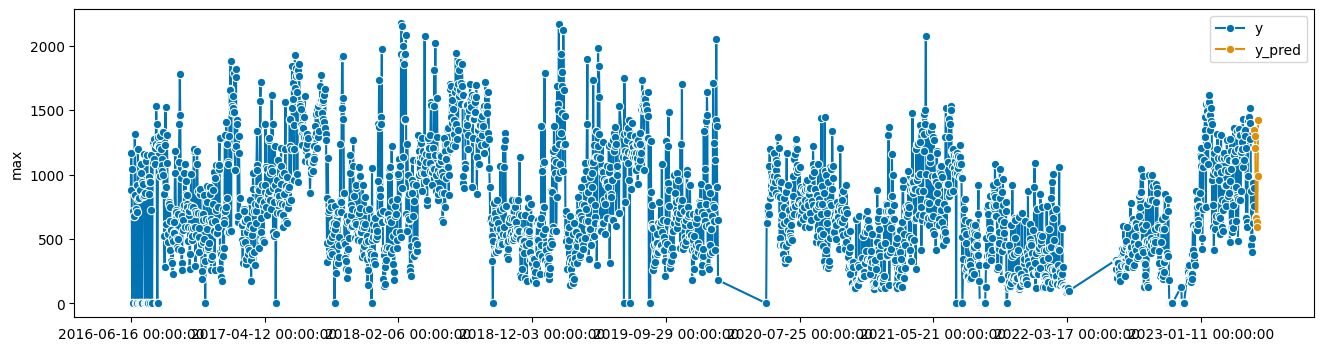

In [136]:
data = dataset.iloc[:,7]
fh = np.arange(1, 10)
forecaster = NaiveForecaster(strategy="last", sp=22)
data = data.asfreq('D')

forecaster.fit(data)

data.index
y_pred = forecaster.predict(fh)
plot_series(data, y_pred, labels=["y", "y_pred"])

In [138]:
from sktime.datasets import load_longley
from sktime.forecasting.var import VAR

_, y = load_longley()

y = y.drop(columns=["UNEMP", "ARMED", "POP"])

forecaster = VAR()
forecaster.fit(y, fh=[1, 2, 3])

y_pred = forecaster.predict()

ModuleNotFoundError: VAR requires package 'statsmodels' to be present in the python environment, but 'statsmodels' was not found. 'statsmodels' is a soft dependency and not included in the base sktime installation. Please run: `pip install statsmodels` to install the statsmodels package. To install all soft dependencies, run: `pip install sktime[all_extras]`

In [142]:
from sktime.forecasting.fbprophet import Prophet
